1 Negative
3 Neutral
5 Positive

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer,word_tokenize
import re
from nltk import FreqDist
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from imblearn.pipeline import Pipeline  # Use imbalanced-learn's Pipeline
from imblearn.over_sampling import SMOTE

In [88]:
data =pd. read_csv('data\Apple-Twitter-Sentiment-DFE.csv',encoding='latin-1 ')
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...
3881,623499442,True,golden,13,NaN,3,0.7757,Tue Dec 09 22:08:53 +0000 2014,5.420000e+17,#AAPL OR @Apple,5\n3,(Via FC) Apple Is Warming Up To Social Media -...
3882,623499450,True,golden,16,NaN,3,0.6225,Tue Dec 09 22:18:27 +0000 2014,5.420000e+17,#AAPL OR @Apple,3\n1,RT @MMLXIV: there is no avocado emoji may I as...
3883,623499486,True,golden,14,NaN,5,0.9347,Tue Dec 09 23:45:59 +0000 2014,5.420000e+17,#AAPL OR @Apple,5,@marcbulandr I could not agree more. Between @...
3884,623499514,True,golden,13,NaN,1,0.9230,Wed Dec 10 00:48:10 +0000 2014,5.420000e+17,#AAPL OR @Apple,1,My iPhone 5's photos are no longer downloading...


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [90]:
data.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


In [91]:
data.describe(include='O')

,_unit_state,_last_judgment_at,sentiment,date,query,sentiment_gold,text
count,3886,3783,3886,3886,3886,103,3886
unique,2,388,4,3795,1,9,3219
top,finalized,12/12/14 2:56,3,Thu Dec 04 20:39:58 +0000 2014,#AAPL OR @Apple,1,"RT @OneRepublic: Studio at 45,000 ft. One out..."
freq,3782,33,2162,5,3886,39,304


### preprocess text

In [92]:
def clean_text(text):
    stopword_list = stopwords.words('english')
    stopword_list += string.punctuation
    #lemmatize
    lemmatizer = WordNetLemmatizer()
    #remove link in text
#     text = re.sub(r"https?:[^\s]+","",text)
#     #remove usernames
#     text = re.sub('@[^\s]+','',text)
#      # Remove single-character words
#     text = re.sub(r'\b\w\b', '', text)
    #remove link,usernames,# and its value  and single characters at once
    text = re.sub(r"https?:[^\s]+|@[\S]+|\b\w\b", "", text)
    #remove hashags as well(\#\w+)
#     text =re.sub(r"https?:[^\s]+|@[\S]+|\b\w\b|\#\w+", "", text)
    
    text = word_tokenize(text)
    text = [word.lower() for word in text if word not in stopword_list]
    text = [lemmatizer.lemmatize(word)for word in text]
    text = ' '.join(text)
    return text

In [93]:
data = data.query('sentiment !="not_relevant"')
data['sentiment'] = data['sentiment'].astype(int)

<ipython-input-93-5f9f7c86083c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].astype(int)


In [94]:
data['cleaned_text'] = data['text'].apply(clean_text)

<ipython-input-94-be71e6273c24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['text'].apply(clean_text)


In [95]:
data[['text','cleaned_text']].head(20)

,text,cleaned_text
0,#AAPL:The 10 best Steve Jobs emails ever...htt...,aapl the 10 best steve job email ever ...
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,rt why aapl stock had mini-flash crash today a...
2,My cat only chews @apple cords. Such an #Apple...,my cat chew cord such applesnob
3,I agree with @jimcramer that the #IndividualIn...,agree individualinvestor trade apple aapl exte...
4,Nobody expects the Spanish Inquisition #AAPL,nobody expects spanish inquisition aapl
5,#AAPL:5 Rocket Stocks to Buy for December Gain...,aapl rocket stock buy december gain apple more...
6,Top 3 all @Apple #tablets. Damn right! http://...,top tablet damn right
7,CNBCTV: #Apple's margins better than expected?...,cnbctv apple margin better expected aapl
8,Apple Inc. Flash Crash: What You Need to Know ...,apple inc flash crash what you need know aapl
9,#AAPL:This Presentation Shows What Makes The W...,aapl this presentation show what make the worl...


In [96]:
data['sentiment'].value_counts() #imbalance for the target variables

3    2162
1    1219
5     423
Name: sentiment, dtype: int64

### EDA

### Data Visualization of Target variables

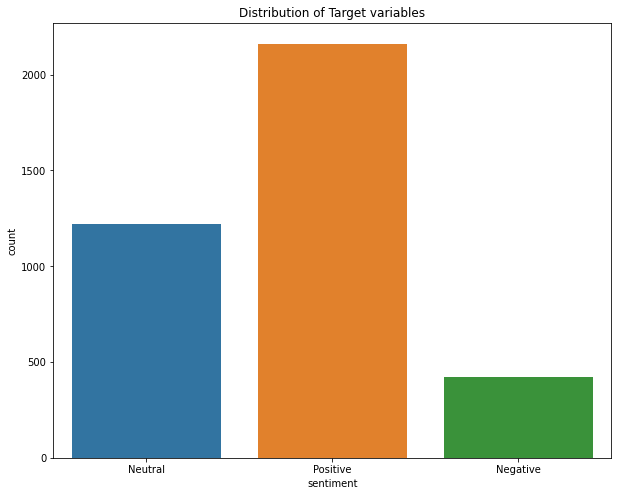

In [97]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(data=data,x='sentiment')
ax.set(title='Distribution of Target variables',xticklabels=['Neutral','Positive','Negative']); # remove not_relevant

### Most common words

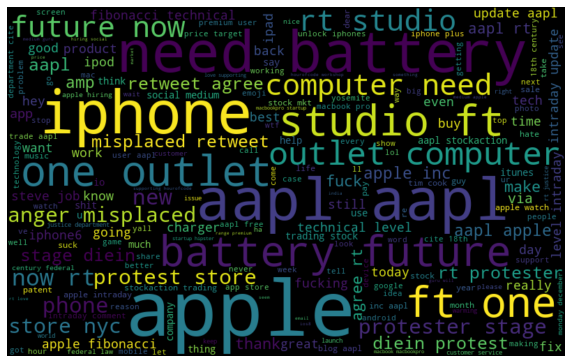

In [98]:
# from wordcloud import WordCloud 
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False, font_path="arial.ttf").generate(" ".join(data['cleaned_text']))
# plt.imshow(wc)
all_words = ' '.join(data['cleaned_text']) ##Convert word list to a single string

#generating the wordcloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#plot the wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

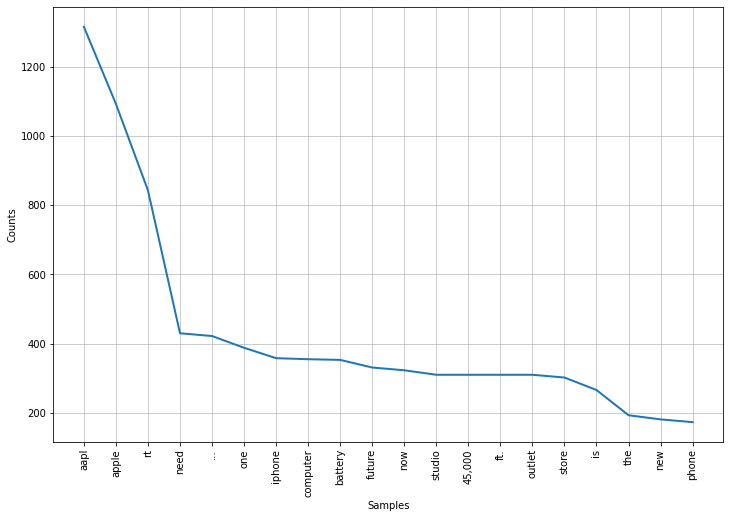

In [99]:
#find the frequency of words
textdata = ' '.join(data['cleaned_text']) #combine all rows into a single text
tokens = word_tokenize(textdata) #tokenize data

fig, ax = plt.subplots(figsize=(12,8))
#Find frequency distribution
ax.fdist =FreqDist(tokens) 

#Plot the 10 most common words
ax.fdist.plot(20)
plt.show()

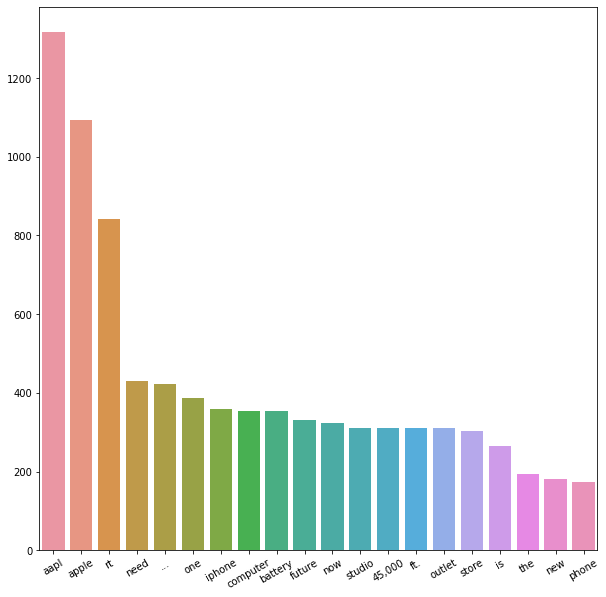

In [100]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(tokens).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

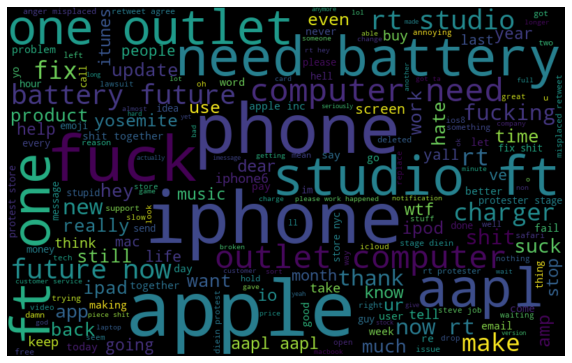

In [101]:
#Negative words
negative_words = ' '.join(data.query("sentiment==1")['cleaned_text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

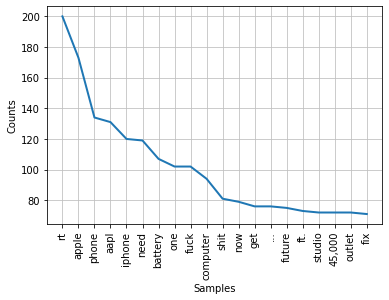

{('...', 76),
 ('45,000', 72),
 ('aapl', 131),
 ('apple', 173),
 ('battery', 107),
 ('computer', 94),
 ('fix', 71),
 ('ft.', 73),
 ('fuck', 102),
 ('future', 75),
 ('get', 76),
 ('iphone', 120),
 ('need', 119),
 ('now', 79),
 ('one', 102),
 ('outlet', 72),
 ('phone', 134),
 ('rt', 200),
 ('shit', 81),
 ('studio', 72)}

In [102]:
negative_tokens = word_tokenize(negative_words) #tokenize data

#Find frequency distribution
fdist =FreqDist(negative_tokens) 

#Plot the 10 most common words
fdist.plot(20)
plt.show()
set(fdist.most_common(20))

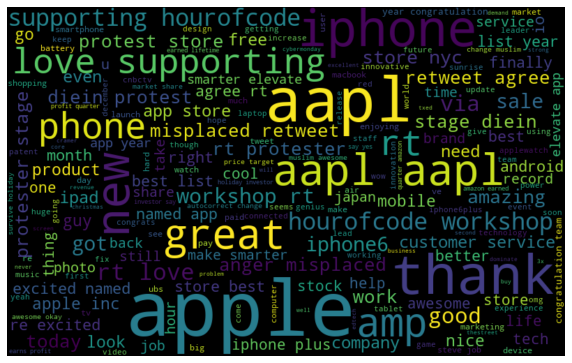

In [103]:
#positive words
positive_words = ' '.join(data.query("sentiment==5")['cleaned_text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

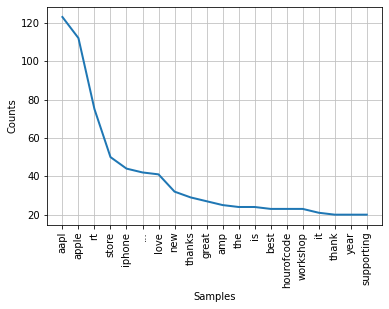

In [104]:
tokens = word_tokenize(positive_words) #tokenize data

#Find frequency distribution
fdist =FreqDist(tokens) 

#Plot the 10 most common words
fdist.plot(20)
plt.show()

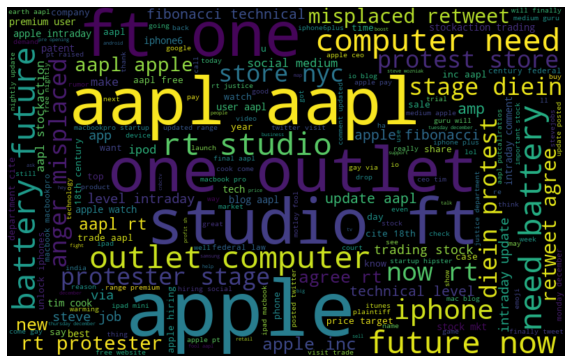

In [105]:
#neutral
neutral_words = ' '.join(data.query("sentiment==3")['cleaned_text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

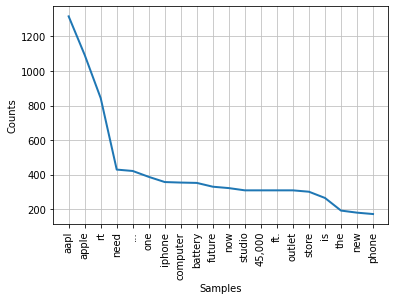

In [106]:
tokens = word_tokenize(all_words) #tokenize data

#Find frequency distribution
fdist =FreqDist(tokens) 

#Plot the 20 most common words
fdist.plot(20)
plt.show()

In [107]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Ensure NLTK is ready
nltk.download('punkt')

# Assuming `data` is a Pandas DataFrame with 'cleaned_text' and 'sentiment' columns
pos_texts = data.query("sentiment==5")['cleaned_text'].tolist()
neg_texts = data.query("sentiment==1")['cleaned_text'].tolist()

# Tokenize words for each sentiment
positive_words = [word for text in pos_texts for word in word_tokenize(text.lower())]
negative_words = [word for text in neg_texts for word in word_tokenize(text.lower())]

# Compute frequency distributions
fdist_pos = FreqDist(positive_words)
fdist_neg = FreqDist(negative_words)

# Find common words appearing in both sentiment groups
common_words = set(fdist_pos.keys()).intersection(set(fdist_neg.keys()))

# Function to remove common words from text
def remove_common_words(text):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word not in common_words]
    return " ".join(filtered_words)

# Apply the function to remove common words from both sentiment groups
data['filtered_text'] = data['cleaned_text'].apply(remove_common_words)

# Display updated DataFrame
data[['sentiment', 'cleaned_text', 'filtered_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gmwende\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-107-098f47fd53e2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['filtered_text'] = data['cleaned_text'].apply(remove_common_words)


,sentiment,cleaned_text,filtered_text
0,3,aapl the 10 best steve job email ever ...,email
1,3,rt why aapl stock had mini-flash crash today a...,mini-flash
2,3,my cat chew cord such applesnob,cat chew applesnob
3,3,agree individualinvestor trade apple aapl exte...,individualinvestor trade extended pullback
4,3,nobody expects spanish inquisition aapl,nobody expects spanish inquisition


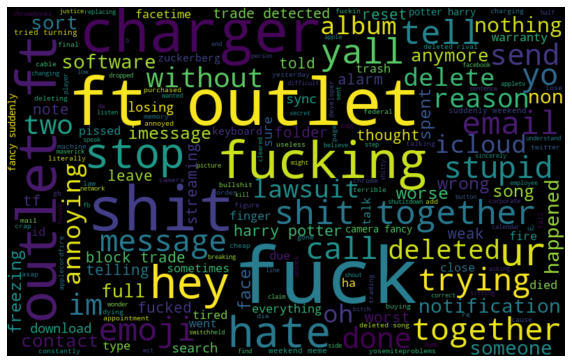

In [108]:
#neutral
neutral_words = ' '.join(data.query("sentiment==1")['filtered_text'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

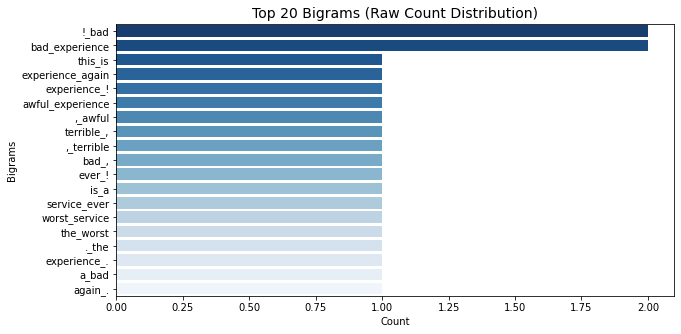

In [109]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import bigrams
from nltk.tokenize import word_tokenize

# Sample negative text (Replace with your actual dataset)
negative_text = "This is a bad experience. The worst service ever! Bad, terrible, awful experience! Bad experience again."
negative_tokens = word_tokenize(negative_text.lower())  # Tokenize and lowercase

## Generate bigrams & convert to list
bigram_list = list(bigrams(negative_tokens))

## ✅ FIX: Get raw counts using Pandas
bigram_counts = pd.DataFrame(bigram_list, columns=["Word1", "Word2"])
bigram_counts["Bigram"] = bigram_counts["Word1"] + "_" + bigram_counts["Word2"]  # Join words with '_'
bigram_counts = bigram_counts["Bigram"].value_counts().reset_index()  # Count occurrences

## ✅ Get the top 20 bigrams
bigram_counts.columns = ["Bigram", "Count"]
bigram_counts = bigram_counts.head(20)

## Setting figure & ax for plots
fig, ax = plt.subplots(figsize=(10, 5))

## ✅ FIX: Use raw counts instead of frequencies
sns.barplot(data=bigram_counts, x="Count", y="Bigram", orient="h", ax=ax, palette="Blues_r")

## Set plot title & labels
ax.set_title("Top 20 Bigrams (Raw Count Distribution)", fontsize=14)
ax.set_xlabel("Count")
ax.set_ylabel("Bigrams")

## Show plot
plt.show()


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 3885
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3804 non-null   int64  
 1   _golden               3804 non-null   bool   
 2   _unit_state           3804 non-null   object 
 3   _trusted_judgments    3804 non-null   int64  
 4   _last_judgment_at     3702 non-null   object 
 5   sentiment             3804 non-null   int32  
 6   sentiment:confidence  3804 non-null   float64
 7   date                  3804 non-null   object 
 8   id                    3804 non-null   float64
 9   query                 3804 non-null   object 
 10  sentiment_gold        102 non-null    object 
 11  text                  3804 non-null   object 
 12  cleaned_text          3804 non-null   object 
 13  filtered_text         3804 non-null   object 
dtypes: bool(1), float64(2), int32(1), int64(2), object(8)
memory usage: 404.

### Modelling

In [111]:
#split data into x and y
X = data['filtered_text']
y = data['sentiment']

#convert token to a list 
data['joined_preprocessed_text'] = data['cleaned_text'].str.join("")

#split data into a training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#create a 'vectorizer' instance
vectorizer = TfidfVectorizer()

#fit the vectorizer to the training data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

<ipython-input-111-772c2256dab8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['joined_preprocessed_text'] = data['cleaned_text'].str.join("")


 ### Baseline Logistic Regression model

In [112]:
logreg = LogisticRegression()

#fit to training data
logreg.fit(X_train_tfidf,y_train)

#predict train data
y_hat_train = logreg.predict(X_train_tfidf)
#predict test data
y_hat_test = logreg.predict(X_test_tfidf)

#get accuracy score
base_train_accuracy = accuracy_score(y_train,y_hat_train)
base_test_accuracy = accuracy_score(y_test,y_hat_test)
print(f"Training Accuracy: {base_train_accuracy}")
print(f"Test Accuracy: {base_test_accuracy}")


Training Accuracy: 0.8478475188958264
Test Accuracy: 0.7069645203679369


### Function to fit, predict and evaluate accuracy

In [113]:
def modelling(pipe):
    pipe.fit(X_train,y_train)
    #predict train data
    y_hat_train = pipe.predict(X_train)
    #predict test data
    y_hat_test = pipe.predict(X_test)

    #get accuracy score
    base_train_accuracy = accuracy_score(y_train,y_hat_train)
    base_test_accuracy = accuracy_score(y_test,y_hat_test)
    print(f"Training Accuracy: {base_train_accuracy}")
    print(f"Test Accuracy: {base_test_accuracy}")
    

### Use pipeline

In [114]:
#pipeline to streamline vectorization and model training
pipeline_base = Pipeline([
    ('base_tdif',TfidfVectorizer()),
    ('base_model',LogisticRegression())
])
pipeline_base.fit(X_train,y_train)

#predict train data
y_hat_train = pipeline_base.predict(X_train)
#predict test data
y_hat_test = pipeline_base.predict(X_test)

#get accuracy score
base_train_accuracy = accuracy_score(y_train,y_hat_train)
base_test_accuracy = accuracy_score(y_test,y_hat_test)
print(f"Training Accuracy: {base_train_accuracy}")
print(f"Test Accuracy: {base_test_accuracy}")

Training Accuracy: 0.8478475188958264
Test Accuracy: 0.7069645203679369


In [115]:
#pipeline to streamline vectorization and model training
pipeline_rdf = Pipeline([
    ('base_tdif',TfidfVectorizer()),
     ('smote', SMOTE(random_state=42)),
    ('base_model',RandomForestClassifier(random_state=42))
])
pipeline_rdf.fit(X_train,y_train)

#predict train data
y_hat_train = pipeline_rdf.predict(X_train)
#predict test data
y_hat_test = pipeline_rdf.predict(X_test)

#get accuracy score
base_train_accuracy = accuracy_score(y_train,y_hat_train)
base_test_accuracy = accuracy_score(y_test,y_hat_test)
print(f"Training Accuracy: {base_train_accuracy}")
print(f"Test Accuracy: {base_test_accuracy}")
pipeline_rdf.predict(['fuckoff'])

Training Accuracy: 0.8912257640486362
Test Accuracy: 0.6386333771353482


array([5])

In [116]:
def predict_sentiment(review):
    review_preprocessed =clean_text(review)
    print(review_preprocessed)
    prediction = pipeline_rdf.predict([review_preprocessed])
    print('prediction:',prediction)
    return "Negative" if prediction[0] == "1" else "Neutral" if prediction[0]=="3"  else "Positive"

review = "bad product"

print("Prediction:", predict_sentiment(review))
# 1 Negative
# 3 Neutral
# 5 Positive

bad product
prediction: [5]
Prediction: Positive


In [117]:
modelling(pipeline_base)

Training Accuracy: 0.8478475188958264
Test Accuracy: 0.7069645203679369


In [118]:
modelling(pipeline_rdf)

Training Accuracy: 0.8912257640486362
Test Accuracy: 0.6386333771353482


In [119]:
pipeline_base.set_params(base_model = RandomForestClassifier(random_state=42) )

Pipeline(steps=[('base_tdif', TfidfVectorizer()),
                ('base_model', RandomForestClassifier(random_state=42))])

In [120]:
modelling(pipeline_base)

Training Accuracy: 0.9263884324679592
Test Accuracy: 0.6964520367936925


In [121]:
pipeline_base.set_params(base_model = DecisionTreeClassifier(random_state=42) )

Pipeline(steps=[('base_tdif', TfidfVectorizer()),
                ('base_model', DecisionTreeClassifier(random_state=42))])

In [122]:
modelling(pipeline_base)

Training Accuracy: 0.9263884324679592
Test Accuracy: 0.6767411300919842


In [123]:
pipeline_base.set_params(base_model = MultinomialNB())

Pipeline(steps=[('base_tdif', TfidfVectorizer()),
                ('base_model', MultinomialNB())])

In [124]:
modelling(pipeline_base)

Training Accuracy: 0.8396319421623398
Test Accuracy: 0.7135348226018396


In [125]:
pipeline_base.set_params(base_model = svm.SVC())
modelling(pipeline_base)

Training Accuracy: 0.9171869865264541
Test Accuracy: 0.7122207621550591


In [126]:
### also do roc_auc curve

In [127]:
###smote

In [128]:
pipeline_base

Pipeline(steps=[('base_tdif', TfidfVectorizer()), ('base_model', SVC())])

### Grid search


In [129]:
# grid_search = GridSearchCV(estimator=pipe,
#              param_grid=param_grid,
#              )


In [130]:
#used randomized search cv first for a rough idea since it is faster

In [131]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution
param_dist = {
    'base_tdif__max_df': np.linspace(0.6, 1.0, 5),
    'base_tdif__min_df': [1, 3, 5],
    'base_tdif__ngram_range': [(1, 1), (1, 2)],
    'base_tdif__stop_words': [None, 'english'],

    'base_model__C': np.logspace(-2, 2, 10),  # Logarithmic scale for C
    'base_model__kernel': ['linear', 'rbf'],
    'base_model__gamma': np.logspace(-3, 1, 5),
}

# Randomized Search (Faster)
random_search = RandomizedSearchCV(pipeline_base, param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'base_tdif__stop_words': 'english', 'base_tdif__ngram_range': (1, 2), 'base_tdif__min_df': 1, 'base_tdif__max_df': 1.0, 'base_model__kernel': 'linear', 'base_model__gamma': 0.01, 'base_model__C': 1.6681005372000592}
Best Score: 0.7173996413447411


In [132]:
#we will use best parameters of randomized search cv  a baseline
param_grid = {
    'base_tdif__stop_words': [None],  # Keep as found
    'base_tdif__ngram_range': [(1, 1), (1, 2)],  # Try unigrams & bigrams
    'base_tdif__min_df': [1, 2],  # Slightly higher min_df
    'base_tdif__max_df': [0.7, 0.8, 0.9],  # Small range around 0.8
    'base_model__kernel': ['rbf'],  # Keep 'rbf' since it performed best
    'base_model__gamma': [0.8, 1.0, 1.2],  # Tune around 1.0
    'base_model__C': [1.5, 1.67, 1.8],  # Narrow range around 1.67
}

# Fine-tune with GridSearchCV
grid_search = GridSearchCV(pipeline_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters after fine-tuning
print("Fine-Tuned Best Parameters:", grid_search.best_params_)
print("Fine-Tuned Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fine-Tuned Best Parameters: {'base_model__C': 1.5, 'base_model__gamma': 1.0, 'base_model__kernel': 'rbf', 'base_tdif__max_df': 0.7, 'base_tdif__min_df': 1, 'base_tdif__ngram_range': (1, 1), 'base_tdif__stop_words': None}
Fine-Tuned Best Score: 0.718051054360038


In [133]:
# Expand C, gamma, and ngram_range while keeping the best values.
param_grid = {
    'base_tdif__ngram_range': [(1, 1), (1, 2),(2,2)],  # Try  bigrams
    'base_tdif__min_df': [1, 2],  # Slightly higher min_df
    'base_tdif__max_df': [0.8, 0.9],  # Small range around 0.8
#     'base_model__kernel': ['rbf'],  # Keep 'rbf' since it performed best
    'base_model__gamma': [0.5, 1.0, 2],  # wide gamma range
    'base_model__C': [0.5, 1.67, 3],  # more range for c
}

# Fine-tune with GridSearchCV
grid_search = GridSearchCV(pipeline_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters after fine-tuning
print("Fine-Tuned Best Parameters:", grid_search.best_params_)
print("Fine-Tuned Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fine-Tuned Best Parameters: {'base_model__C': 1.67, 'base_model__gamma': 1.0, 'base_tdif__max_df': 0.8, 'base_tdif__min_df': 1, 'base_tdif__ngram_range': (1, 1)}
Fine-Tuned Best Score: 0.7173969406274306


In [134]:
#Trying Xg boost
from xgboost import XGBClassifier
pipeline_base.set_params(base_model =XGBClassifier() )
modelling(pipeline_base)

Training Accuracy: 0.7755504436411436
Test Accuracy: 0.6767411300919842


In [135]:
len(data)

3804

In [136]:
#bert